In [1]:
import json
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np
import copy


In [14]:
def fill_grid(minYear,maxYear,nRows,nCols,df,dim):
    minLon=min(df['coord y'])
    minLat=min(df['coord x'])
    maxLat=max(df['coord x'])
    maxLon=max(df['coord y'])
    yearMatrices={}
    for i in range(int(minYear),int(maxYear)+1):
        yearMatrices[i]=np.zeros((int(nRows+1),int(nCols+1)))
    for coordLine in df.as_matrix():
        x=coordLine[0]
        y=coordLine[1]
        year=int(coordLine[2])
        matX=round(x-minLat,dim)
        matX=matX*10**dim
        matY=round(y-minLon,dim)
        matY=matY*10**dim
        matX=int(round(matX))
        matY=int(round(matY))
        yearMatrices[year][matX-1,matY-1]=yearMatrices[year][matX-1,matY-1]+1
    return yearMatrices

In [12]:
def make_grid(dim,df):
    dim=2
    minLon=min(df['coord y'])
    minLat=min(df['coord x'])
    maxLat=max(df['coord x'])
    maxLon=max(df['coord y'])
    nRows=round(maxLat-minLat,dim)*(10**dim)

    nCols=round(maxLon-minLon,dim)*(10**dim)
    print("no rows/no columns",nCols,nRows)
    print("minlat/maxlat/minlon/maxlon:",minLat,maxLat,minLon,maxLon)
    matrix=np.zeros((int(nRows+1),int(nCols+1)))
    return matrix,nRows,nCols

In [5]:
def convDict(yearMatrices,stride):
    mat=copy.deepcopy(yearMatrices)
    filt=np.ones([stride,stride])
    for a in mat.keys():
        mat[a]=signal.convolve2d(mat[a],filt,mode='same')
    return mat

In [96]:
def makeNewDict(yearMatrices):
    newList={}
    for year in yearMatrices.keys():
        filters=[(i+1)*10 for i in range(9)]
        filtList=[]
        filtList.append(yearMatrices)
        for stride in filters:
            filtList.append(convDict(yearMatrices,stride))

        for dictio in filtList:
#             print(dictio)
            for row in range(dictio[year].shape[0]):
                for column in range(dictio[year].shape[1]):
                    if (row,column) not in newList.keys():
                        newList[(row,column)]=[]
                    newList[(row,column)].append(year)
#                     if year==2019:
#                         print(dictio[year][row][column])
                    newList[(row,column)].append(dictio[year][row][column])
    for ind in newList.keys():
        newList[ind].append(ind)
    
    newDf=pd.DataFrame.from_dict(newList, orient='index', dtype=None, columns=None)
#     newDf=newDf.reindex(sorted(newDf.columns), axis=1)
    return newDf
                
                
            

In [97]:
a=makeNewDict(yearMat)

In [98]:
pd.set_option('display.max_columns', 1000)
a.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
count,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000,23595.0,23595.000000
mean,2015.0,9.553549,2015.0,954.408561,2015.0,3771.004026,2015.0,8250.635728,2015.0,14293.736809,2015.0,21866.509854,2015.0,30769.989193,2015.0,40713.928587,2015.0,51393.915830,2015.0,62637.002628,2016.0,12.501971,2016.0,1247.631702,2016.0,4959.666031,2016.0,11021.448188,2016.0,19314.249629,2016.0,29741.640178,2016.0,42128.710278,2016.0,56204.761983,2016.0,71531.426107,2016.0,87537.368002,2017.0,7.123967,2017.0,709.590167,2017.0,2820.986650,2017.0,6282.280992,2017.0,11050.103836,2017.0,17071.727061,2017.0,24203.717186,2017.0,32340.234711,2017.0,41109.146853,2017.0,50144.789065,2018.0,4.834965,2018.0,482.516211,2018.0,1924.319559,2018.0,4302.696758,2018.0,7585.751218,2018.0,11720.385675,2018.0,16601.484213,2018.0,22156.650689,2018.0,28174.477898,2018.0,34351.065989,2019.0,0.641026,2019.0,63.967366,2019.0,255.143039,2019.0,572.213605,2019.0,1014.318288,2019.0,1580.455605,2019.0,2267.883026,2019.0,3073.671329,2019.0,3982.598686,2019.0,4965.210426
std,0.0,50.087527,0.0,1804.630906,0.0,5006.563872,0.0,8909.064945,0.0,13449.617893,0.0,18427.982848,0.0,23536.047534,0.0,28659.564445,0.0,33684.241898,0.0,38179.409841,0.0,53.708456,0.0,1879.634352,0.0,5518.546809,0.0,10259.974802,0.0,15778.948259,0.0,21951.132414,0.0,28312.459306,0.0,34506.809823,0.0,40219.412227,0.0,45335.148747,0.0,38.183249,0.0,1104.002666,0.0,3166.214202,0.0,5954.972681,0.0,9224.991450,0.0,12790.951809,0.0,16544.932615,0.0,20201.686016,0.0,23683.220701,0.0,26953.501117,0.0,31.709858,0.0,929.265577,0.0,2476.473959,0.0,4422.880774,0.0,6593.817135,0.0,8874.990575,0.0,11241.549351,0.0,13558.255998,0.0,15698.390742,0.0,17688.611766,0.0,12.572903,0.0,229.243973,0.0,536.687394,0.0,919.581319,0.0,1334.844317,0.0,1762.456314,0.0,2175.785958,0.0,2541.696300,0.0,2829.316390,0.0,3001.694276
min,2015.0,0.000000,2015.0,0.000000,2015.0,0.000000,2015.0,0.000000,2015.0,0.000000,2015.0,0.000000,2015.0,0.000000,2015.0,0.000000,2015.0,0.000000,2015.0,64.000000,2016.0,0.000000,2016.0,0.000000,2016.0,0.000000,2016.0,0.000000,2016.0,0.000000,2016.0,0.000000,2016.0,0.000000,2016.0,0.000000,2016.0,0.000000,2016.0,95.000000,2017.0,0.000000,2017.0,0.000000,2017.0,0.000000,2017.0,0.000000,2017.0,0.000000,2017.0,0.000000,2017.0,0.000000,2017.0,0.000000,2017.0,0.000000,2017.0,452.000000,2018.0,0.000000,2018.0,0.000000,2018.0,0.000000,2018.0,0.000000,2018.0,0.000000,2018.0,0.000000,2018.0,0.000000,2018.0,0.000000,2018.0,0.000000,2018.0,1136.000000,2019.0,0.000000,2019.0,0.000000,2019.0,0.000000,2019.0,0.000000,2019.0,0.000000,2019.0,0.000000,2019.0,0.000000,2019.0,0.000000,2019.0,0.000000,2019.0,41.000000
25%,2015.0,0.000000,2015.0,0.000000,2015.0,0.000000,2015.0,216.000000,2

In [111]:
def name_cols(newDf):
    columnsUneven=[str(i) for i in range(50)]
    columnsEven=[]
    cols=[]
    for j in ['2015','2016', '2017', '2018', '2019']:
        for i in range(10):
            columnsEven.append(str(j)+' '+str(i*10)+" km2")
    for i in range(len(columnsUneven)+len(columnsEven)+2):
        if (i+1)%2==0:
            cols.append(columnsEven[int(i/2)-1])
        else:
            cols.append(columnsUneven[int(i/2)-1])
    cols=cols[2:len(cols)]
    cols.append('coordinate')
#     print(cols)
    newDf.columns =cols
    newDf=newDf.drop([str(i) for i in range(50)],axis=1)
    return newDf

In [113]:
def main():
    for i in range(15):
        print("file number:",i)
        with open ("Data2_12_04-2019/Glad_subset"+str(i+6)+".json") as f:
             data = json.load(f)
        df=pd.DataFrame(data['features'])
        df['coord']=df['geometry'].apply(lambda x: x['coordinates'])
        df['coord x']=df['coord'].apply(lambda x: x[0])
        df['coord y']=df['coord'].apply(lambda x: x[1])


        df['year']=df['properties'].apply(lambda x: x['year'])
        df=df.drop(['geometry','properties','type','coord'],axis=1)
        df=df.astype(float)
        dim=2
        grid,nRows,nCols=make_grid(dim,df)
        minYear=min(df['year'])
        maxYear=max(df['year'])
        yearMatrices=fill_grid(minYear,maxYear,nRows,nCols,df,dim)
        dfWithComplData=makeNewDict(yearMatrices)
#         print(len(dfWithComplData.keys()))
        newDf=name_cols(dfWithComplData)
        newDf.to_csv("model files/subset"+str(i)+".csv")

        
yearMat=main()

file number: 0
no rows/no columns 194.0 120.0
minlat/maxlat/minlon/maxlon: 0.817875 2.018875 109.035125 110.973625


C:\Users\larsr\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


file number: 1
no rows/no columns 115.99999999999999 130.0
minlat/maxlat/minlon/maxlon: 0.320375 1.622125 108.872625 110.028875
file number: 2
no rows/no columns 99.0 90.0
minlat/maxlat/minlon/maxlon: 0.316875 1.212375 109.435375 110.422875
file number: 3
no rows/no columns 95.0 89.0
minlat/maxlat/minlon/maxlon: -0.515375 0.375375 109.309125 110.258875
file number: 4
no rows/no columns 88.0 66.0
minlat/maxlat/minlon/maxlon: -0.679375 -0.021625 110.025625 110.910625
file number: 5
no rows/no columns 63.0 53.0
minlat/maxlat/minlon/maxlon: -0.522375 0.006125 110.886875 111.512875
file number: 6
no rows/no columns 45.0 51.0
minlat/maxlat/minlon/maxlon: -0.572125 -0.064375 111.750625 112.199875
file number: 7
no rows/no columns 132.0 134.0
minlat/maxlat/minlon/maxlon: -1.916625 -0.576625 112.868125 114.190125
file number: 8
no rows/no columns 41.0 45.0
minlat/maxlat/minlon/maxlon: 0.017625 0.470625 116.757375 117.171875
file number: 9
no rows/no columns 32.0 37.0
minlat/maxlat/minlon/maxlon

In [49]:
np.mean(yearMat[2019])

1.013788098693759

# visual

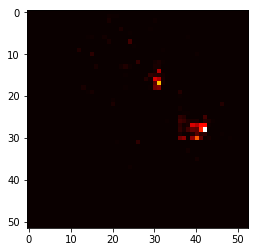

In [39]:
plt.imshow(yearMat[2019], cmap='hot')
plt.show()